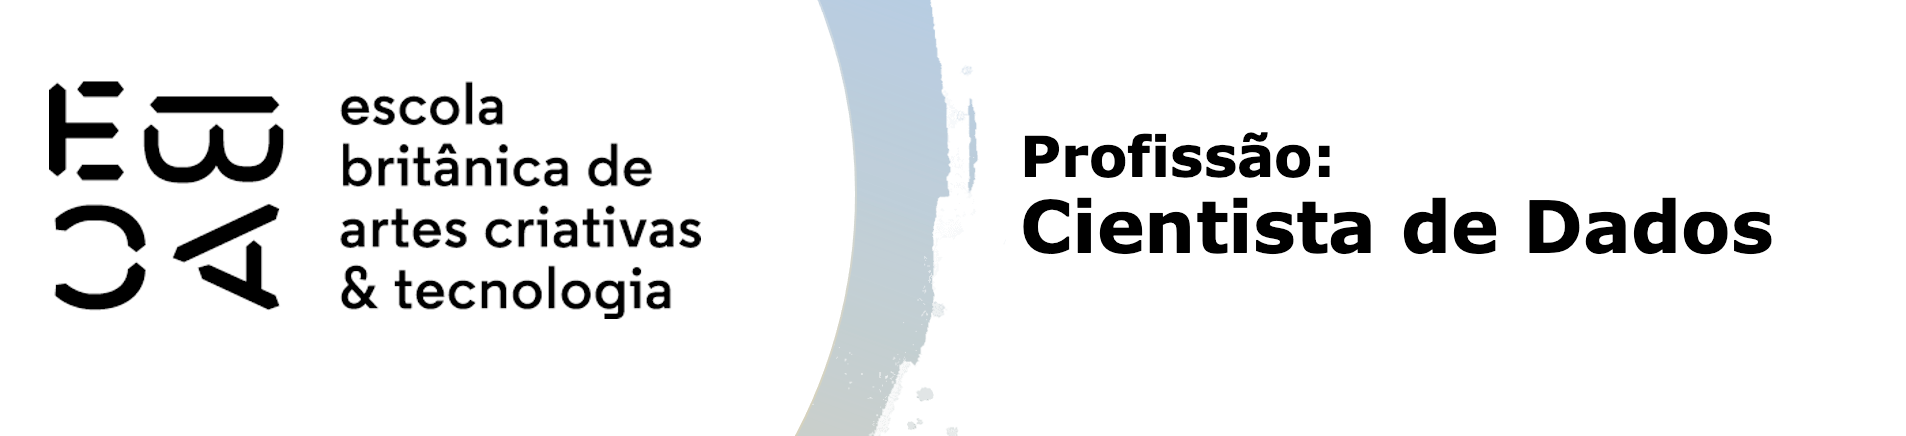

# Análise descritiva

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [16]:
# Primeiramente é necessário realizar as mudanças no df, para separar os dados de janeiro de 2020 em diante. Portanto podemos utilizar a coluna 'Ano' para realizar esse filtro.
df_filtro = df[df['Ano'] >= 2020]

df_filtro

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
100702,64.963.044/0001-08,FARMACLUB DROGARIAS LTDA,3114110,2020-06-30,179.55,2020-06-30,0.0,Liberado,2020,1,0.0,0,Farmácia
100703,00.776.574/0022-80,B2W Companhia Digital,9344628,2020-06-30,63.38,2020-06-30,0.0,Liberado,2020,1,0.0,0,não definido
100704,13.986.197/0002-02,LOJA ELECTROLUX COM VIRTUAL DE ELET,387412,2020-06-30,396.41,2020-06-30,0.0,Liberado,2020,1,0.0,0,não definido
100705,61.585.865/0703-62,RAIADROGASIL S/A,8121,2020-06-30,53.90,2020-06-30,0.0,Liberado,2020,1,0.0,0,Farmácia
100706,15.436.940/0003-67,AMAZON SERVICOS DE VAREJO DO BRASIL LTDA,5889036,2020-06-30,32.90,2020-06-30,0.0,Liberado,2020,1,0.0,0,Varejo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.0,Liberado,2021,2,0.0,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.0,Liberado,2021,2,0.0,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado


In [17]:
# Filtrando os dados para considerar apenas os retornos positivos e desconsiderar os valores faltantes
df_filtrado = df_filtro[(df_filtro['Retorno']>0) & (df_filtro ["Retorno"].notna())]
df_filtrado

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
100707,56.527.062/0016-97,SUPERMERCADO HIROTA LT,19636,2020-06-30,12.89,2020-06-30,0.77,Liberado,2020,1,0.059736,1,Mercado
100708,12.264.015/0001-46,DOCES DOCELANDIA e VAZ EIRELI,286492,2020-06-30,167.38,2020-06-30,7.11,Liberado,2020,1,0.042478,1,Restaurantes
100710,01.937.635/0020-45,SONDA SUPERMERCADOS EXPORTACAO E IMPORTACAO S A,49225,2020-06-30,135.00,2020-06-30,7.75,Liberado,2020,1,0.057407,1,Mercado
100712,08.479.223/0001-95,ONISSK COMERCIO VESTUARIO LTDA,970,2020-06-30,301.10,2020-06-30,56.40,Liberado,2020,1,0.187313,1,Construção
100713,43.721.596/0001-21,MERCADINHO EXPRESSO LT,83322,2020-06-30,92.61,2020-06-30,3.30,Liberado,2020,1,0.035633,1,Mercado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187632,40.313.605/0001-57,MERCADO PET SHOP LTDA,8393,2021-01-07,16.05,2021-01-07,2.95,Liberado,2021,2,0.183801,1,Varejo
187634,02.928.162/0001-10,COML DE ALIMENTOS TAKARA MUTINGA LTDA,263459,2021-01-07,4.75,2021-01-07,0.61,Liberado,2021,2,0.128421,1,Alimentos
187636,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA,533989,2021-01-07,43.16,2021-01-07,1.88,Liberado,2021,2,0.043559,1,Mercado
187637,50.876.002/0001-17,PANIFICADORA E CONFEITARIA CHIP S LTDA,41909,2021-01-07,27.22,2021-01-07,10.80,Liberado,2021,2,0.396767,1,Restaurantes


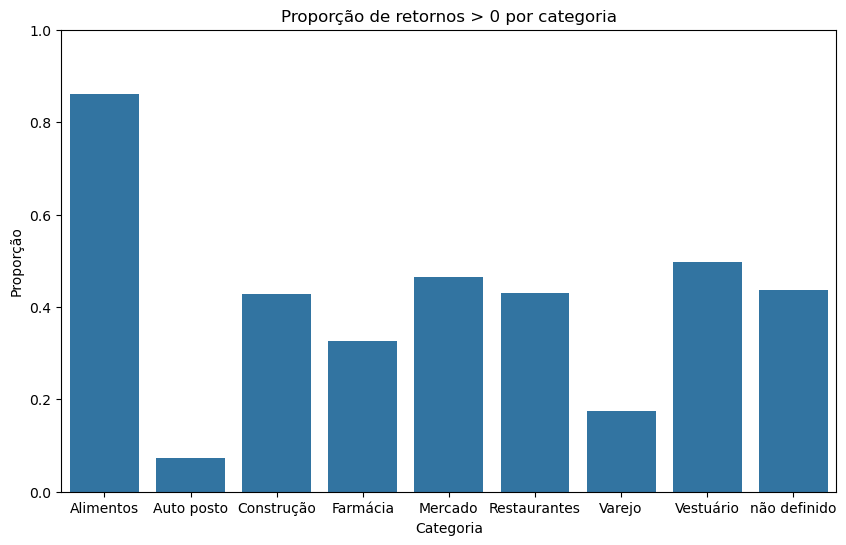

In [18]:
# Apos o preprocessamento dos dados, podemos criar o gráfico de barras para analisar os "Retornos" por categoria de estabelecimento
# Para isso será necessario criar agrupamentos por categoria e verificar a proportão de cada uma
df["retorno_positivo"] = (df["Retorno"] > 0).astype(int)
proporcao = df.groupby("categoria")["retorno_positivo"].mean().reset_index()
proporcao.rename(columns={"retorno_positivo": "proporcao_positivo"}, inplace=True)

# Criando o gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=proporcao, x="categoria", y="proporcao_positivo")

plt.title("Proporção de retornos > 0 por categoria")
plt.ylabel("Proporção")
plt.xlabel("Categoria")
plt.ylim(0, 1)  # proporções vão de 0 a 1
plt.show()

C:\Users\Rafael\AppData\Local\Temp\ipykernel_26548\3752660433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["retorno_positivo"] = (df["Retorno"] > 0).astype(int)


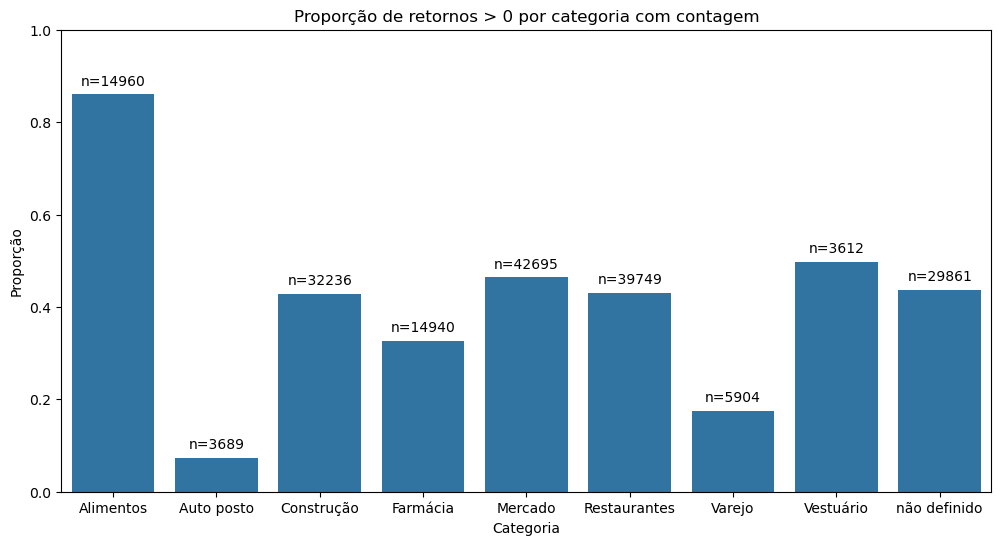

In [19]:
# Para melhorar a visualização dos dados pelo grafico, é possivel incluir a quantidade de observações em cada categoria
df_filtrado["retorno_positivo"] = (df["Retorno"] > 0).astype(int)
proporcao_contada = df.groupby("categoria")["retorno_positivo"].mean().reset_index()
proporcao_contada = df.groupby("categoria").agg(proporcao_positivo=("retorno_positivo", "mean"), total=("retorno_positivo", "size")).reset_index()

# Criando o gráfico de barras contendo a contagem de observações
plt.figure(figsize=(12,6))
fig = sns.barplot(data=proporcao, x="categoria", y="proporcao_positivo")

# Incluindo a contagem de observações acima das barras
for i, row in proporcao_contada.iterrows():
    fig.text(i, row["proporcao_positivo"] + 0.02, f'n={row.total}', color='black', ha="center")
plt.title("Proporção de retornos > 0 por categoria com contagem")
plt.ylabel("Proporção")
plt.xlabel("Categoria")
plt.ylim(0, 1)
plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [20]:
# Para realizar o calculo de WOE (Weight of Evidence) e IV (Information Value), é necessário criar uma variavel binaria.
df["evento"] = (df["Retorno"] > 0).astype(int)

In [21]:
# Criação da tabela cruzada com os eventos
tabela = pd.crosstab(df['categoria'], df['retorno_positivo'])
tabela.columns = ['Negativo', 'Positivo']
tabela

,Negativo,Positivo
categoria,,
Alimentos,2092,12868
Auto posto,3418,271
Construção,18425,13811
Farmácia,10054,4886
Mercado,22887,19808
Restaurantes,22631,17118
Varejo,4869,1035
Vestuário,1813,1799
não definido,16819,13042


In [22]:
# Calculo das distribuições totais de eventos positivos e negativos
total_positivo = tabela['Positivo'].sum()
total_negativo = tabela['Negativo'].sum()

# Calculo das proporções de eventos positivos e negativos por categoria
tabela['Distribuicao_positivo'] = tabela['Positivo'] / total_positivo
tabela['Distribuicao_negativo'] = tabela['Negativo'] / total_negativo

In [24]:
# Calculo do WOE
tabela['WOE'] = np.log(tabela['Distribuicao_positivo'] / tabela['Distribuicao_negativo'])
tabela

,Negativo,Positivo,Distribuicao_positivo,Distribuicao_negativo,WOE
categoria,,,,,
Alimentos,2092,12868,0.152036,0.020309,2.013046
Auto posto,3418,271,0.003202,0.033182,-2.338269
Construção,18425,13811,0.163177,0.178870,-0.091820
Farmácia,10054,4886,0.057728,0.097604,-0.525173
Mercado,22887,19808,0.234032,0.222187,0.051940
Restaurantes,22631,17118,0.202250,0.219701,-0.082767
Varejo,4869,1035,0.012229,0.047268,-1.352064
Vestuário,1813,1799,0.021255,0.017601,0.188671
não definido,16819,13042,0.154092,0.163279,-0.057911


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [25]:
# Após o calculo do WOE, podemos calcular o IV
tabela["IV"] = (tabela["Distribuicao_positivo"] - tabela["Distribuicao_negativo"] * tabela["WOE"])
iv_total = tabela["IV"].sum()

In [27]:
# Para visualozar o WOE e o IV das categorias, podemos criar uma tablela resumo
tabela_resumo = tabela[['WOE', 'IV']].reset_index()
tabela_resumo

,categoria,WOE,IV
0,Alimentos,2.013046,0.111153
1,Auto posto,-2.338269,0.080790
2,Construção,-0.091820,0.179601
3,Farmácia,-0.525173,0.108987
4,Mercado,0.051940,0.222492
5,Restaurantes,-0.082767,0.220434
6,Varejo,-1.352064,0.076138
7,Vestuário,0.188671,0.017935
8,não definido,-0.057911,0.163547


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


Ao realizar a analise com o IV, podemos chegar nas seguintes conclusões sobre cada uma das categorias:
    - A categoria Vestuário não apresenta poder preditivo.
    - As categorias Auto posto e Varejo apresentam um poder preditivo fraco.
    - As categorias Alimentos, Construção, Farmácia, Mercado, Restaurantes e "nao definido", apresentam um poder preditivo médio.